## Team:
######Mona ElSayed       19105733
######Reem Abdelazim     19100671
######Sohaila Hussein    19104679
######Israa Salah        19105880
######Alaa Nasser        19105715

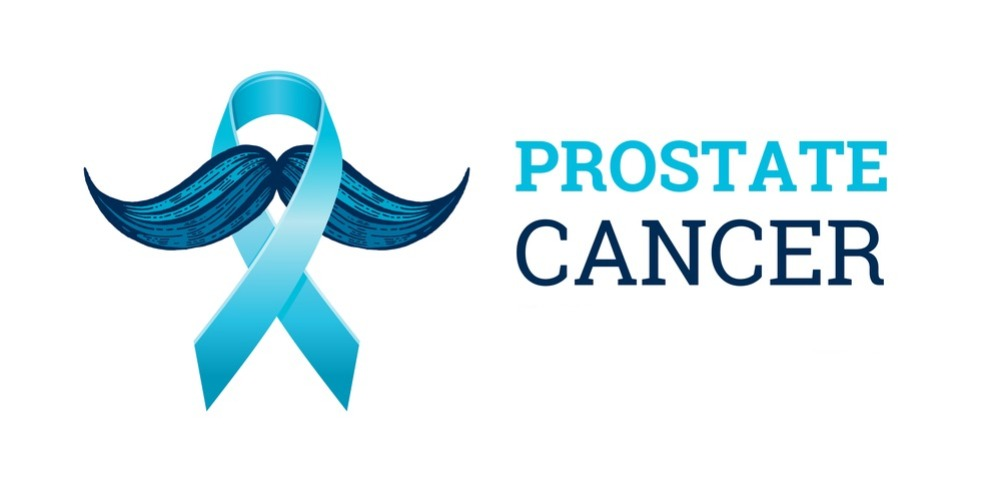

#Table of contents


01.   EDA &  VISUALIZATION
02.   ANN
03.   SVM
04.   KNN
05.   Random Forest
06.   Desicion Tree
07.   Logistic Regression
08.   Compare all of these Classification Models & VISUALIZ


In [1]:
import os
import numpy as np 
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.svm import SVC
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from keras.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier


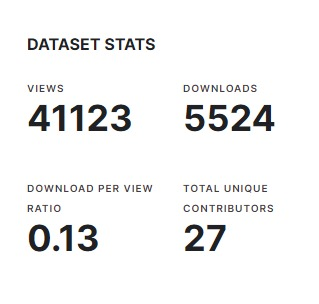

###Read the data


In [2]:
PCD = pd.read_csv("Prostate_Cancer.csv")

In [3]:
print('Dataset :',PCD.shape)
x = PCD.iloc[:, [0, 1, 2, 3]].values
PCD.info()
PCD[0:5]

Dataset : (100, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0   1                M      23       12        151   954       0.143   
1   2                B       9       13        133  1326       0.143   
2   3                M      21       27        130  1203       0.125   
3   4                M      14       16         78   386       0.070   
4   5                M       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059

In [4]:
PCD.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

###Change (B,M )to binary numbers (0,1)


*   Beningn   Tumour : Noncancerous

*   Malignant Tumour : Cancerous




In [5]:
PCD['diagnosis_result'] = PCD['diagnosis_result'].replace(['B'],'0')
PCD['diagnosis_result'] = PCD['diagnosis_result'].replace(['M'],'1')

###Drop unnecessary columns 

In [6]:
PCD.drop(['id'],axis=1,inplace=True)

In [7]:
PCD.head()

diagnosis_result  radius  texture  perimeter  area  smoothness  compactness  \
0                1      23       12        151   954       0.143        0.278   
1                0       9       13        133  1326       0.143        0.079   
2                1      21       27        130  1203       0.125        0.160   
3                1      14       16         78   386       0.070        0.284   
4                1       9       19        135  1297       0.141        0.133   

   symmetry  fractal_dimension  
0     0.242              0.079  
1     0.181              0.057  
2     0.207              0.060  
3     0.260              0.097  
4     0.181              0.059

###Visualization

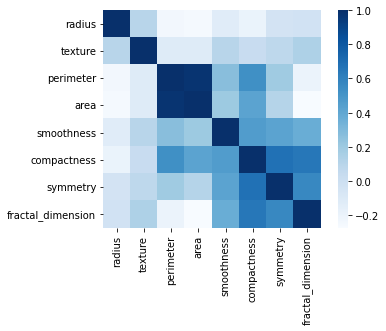

In [8]:
Cancer = PCD[['diagnosis_result', 'radius','texture','perimeter','area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']] 
cor = Cancer.corr() 
sns.heatmap(cor, square = True,cmap="Blues")

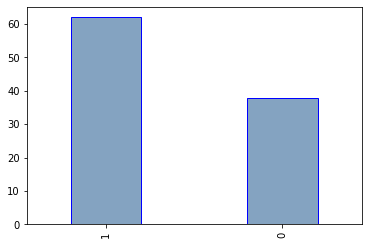

In [9]:
PCD.diagnosis_result.value_counts().plot(kind='bar', color=(0.2, 0.4, 0.6, 0.6),edgecolor='blue', width = 0.4)
plt.show()

###Drop diagnosis result

In [10]:
y = PCD.diagnosis_result.values
PCD_without_D = PCD.drop(['diagnosis_result'],axis=1)
S_caler = MinMaxScaler(feature_range=(0,1))
x = S_caler.fit_transform(PCD_without_D)

In [11]:
y

array(['1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '0', '0', '1'], dtype=object)

###Split the dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

###Make lists to compare between models accuracy


In [13]:
ModelName=[]
ModelAccuracy=[]

#Artificial Neural Network


In [ ]:
def buildclass():
    classifier = Sequential()
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = buildclass, epochs = 300)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

<ipython-input-15-ef050ce36f8b>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = buildclass, epochs = 300)


Epoch 1/300
2/2 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.4528
Epoch 2/300
2/2 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5472
Epoch 3/300
2/2 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5472
Epoch 4/300
2/2 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5472
Epoch 5/300
2/2 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5472
Epoch 6/300
2/2 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5472
Epoch 7/300
2/2 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5472
Epoch 8/300
2/2 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5472
Epoch 9/300
2/2 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.5472
Epoch 10/300
2/2 [==============================] - 0s 10ms/step - loss: 0.6920 - accuracy: 0.5472
Epoch 11/300
2/2 [=========

In [14]:
ModelName.append("ANN")
ModelAccuracy.append(0.86)

#Logistic Regression

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

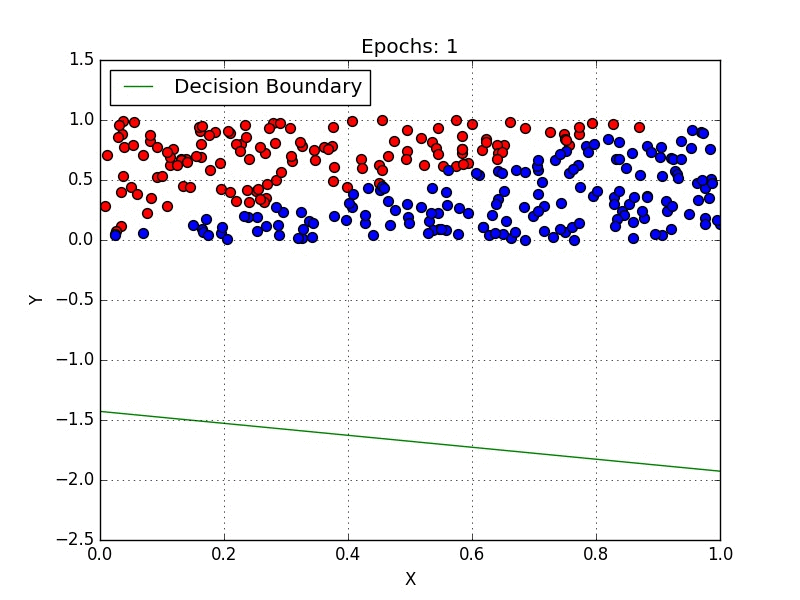

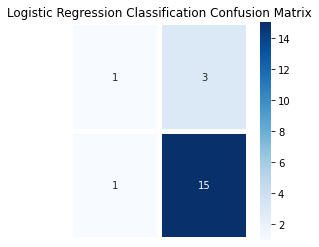

0.8


In [ ]:
#high c value indicates how much we trust the data we have
#C indicates that training data is more important and reflects the real world data
log_reg = LogisticRegression(C=10.0)

#we spilt the data into xtrian and ytrain 
#trains the algorithm on the training data, after the model is initialized 
log_reg.fit(x_train, y_train)

#we use the . predict function to predict our depenednt variable 
Y_prediction = log_reg.predict(x_test)

#we do compute our confusion matrix to calculate the accuarcy of it 
log_reg_cm = confusion_matrix(y_test, Y_prediction)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(log_reg_cm, annot=True, linewidth=4, linecolor='white', fmt='g', ax=ax, cmap="Blues")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y prediction')
plt.ylabel('Y test')
plt.axis("off")
plt.show()

#the logistic regression score using .score function 
#Returns the coefficient of determination R^2 of the prediction
score_log_reg = log_reg.score(x_test, y_test)
print(score_log_reg)

In [15]:
ModelName.append("LR")
ModelAccuracy.append(0.80)

#Support Vector Machine


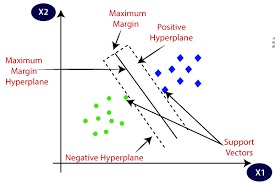

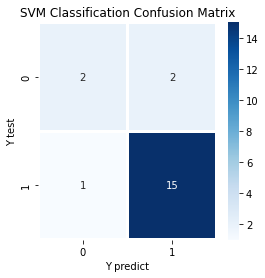

0.85


In [ ]:
#high c value indicates how much we trust the data we have
#C indicates that training data is more important and reflects the real world data
#Radial basis function (RBF) networks are a commonly used type of artificial neural network for function approximation problems
#-1 means using all processors. 
#we get the same train and test sets across different executions
svm_classfication = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=42, probability=True),n_jobs=-1))

##we spilt the data into xtrian and ytrain 
#trains the algorithm on the training data, after the model is initialized 
svm_classfication.fit(x_train, y_train)

#get the y prediction 
Y_prediction2 = svm_classfication.predict(x_test)

#perform the confusion matrix to compute the accuracy 
svm_classfication_cm = confusion_matrix(y_test, Y_prediction2)
f, ax = plt.subplots(figsize=(4,4))

#display it 
sns.heatmap(svm_classfication_cm, annot=True, linewidth=2, linecolor='white', fmt='g', ax=ax, cmap="Blues")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

#calculate the score using score function
score_svm_classfication = svm_classfication.score(x_test, y_test)
print(score_svm_classfication)

In [16]:
ModelName.append("SVM")
ModelAccuracy.append(0.85)

#Decision Tree


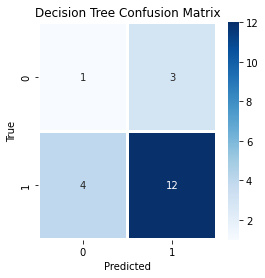

0.65


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat,annot=True,linewidths=2,linecolor="white",fmt="g",ax=ax, cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
score_DTclass= dt.score(x_test, y_test)
print(score_DTclass)

In [17]:
ModelName.append("Decision Tree")
ModelAccuracy.append(0.65)

#Random Forest

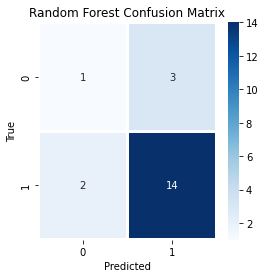

0.75


In [ ]:
randomf = RandomForestClassifier(n_estimators=100, random_state=42)
randomf.fit(x_train,y_train)

y_pred = randomf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat,annot=True,linewidths=2,linecolor="white",fmt="g",ax=ax, cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
score_RFclass= randomf.score(x_test, y_test)
print(score_RFclass)

In [18]:
ModelName.append("Random Forest")
ModelAccuracy.append(0.75)

#k-Nearest Neighbors

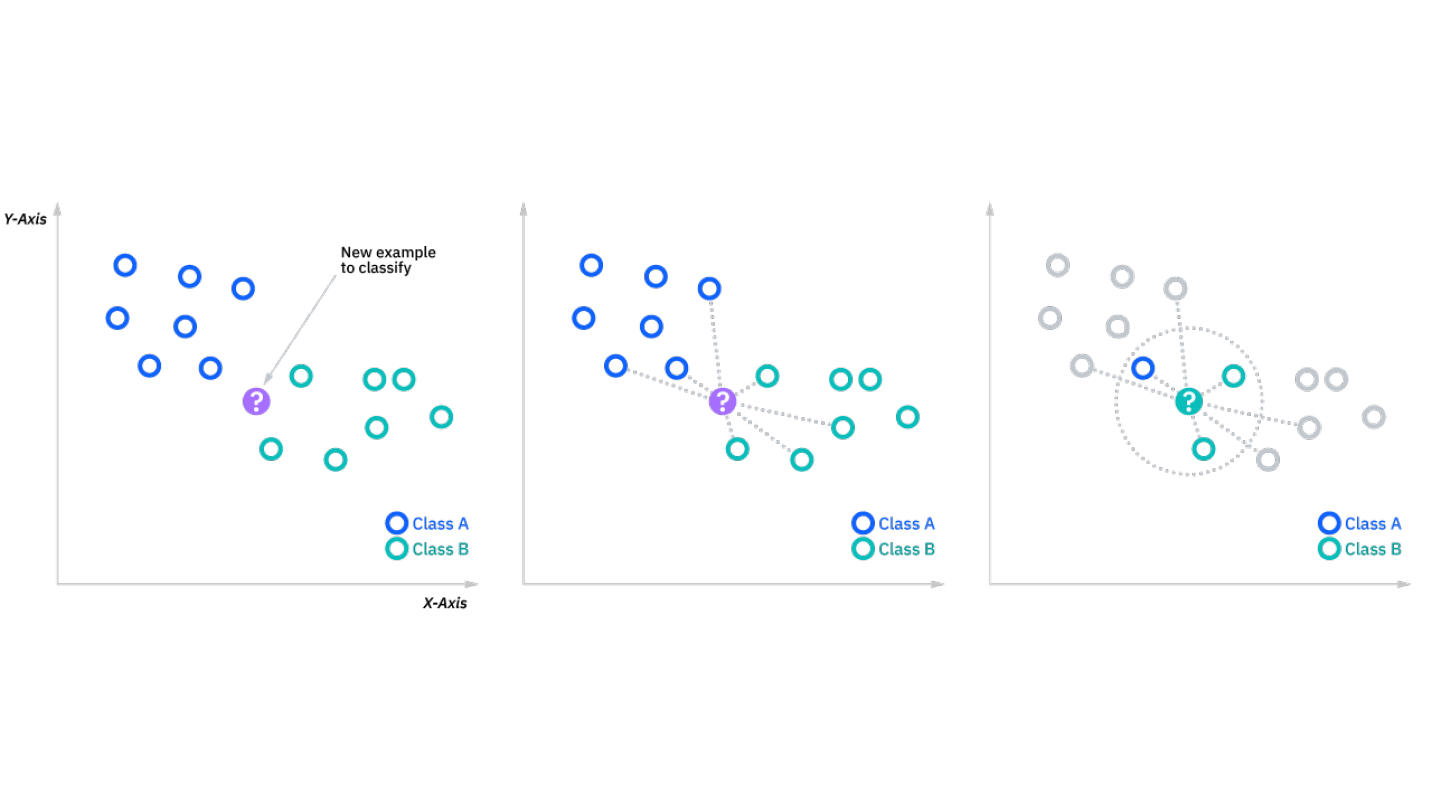

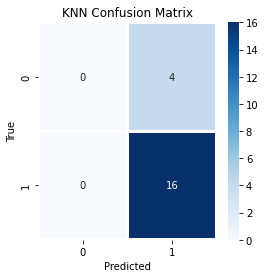

0.8


In [ ]:
knnclass = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

knnclass.fit(x_train, y_train)

Y_prediction = knnclass.predict(x_test)

knnclass_convmtrx = confusion_matrix(y_test, Y_prediction)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(knnclass_convmtrx, annot=True, linewidth=2, linecolor='white', fmt='g', ax=ax, cmap="Blues")
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

score_knnclass= knnclass.score(x_test, y_test)
print(score_knnclass)

In [19]:
ModelName.append("kNN")
ModelAccuracy.append(0.80)

#Comparison of the accuracy between all models

Text(0, 0.5, 'Model_Accuracy')

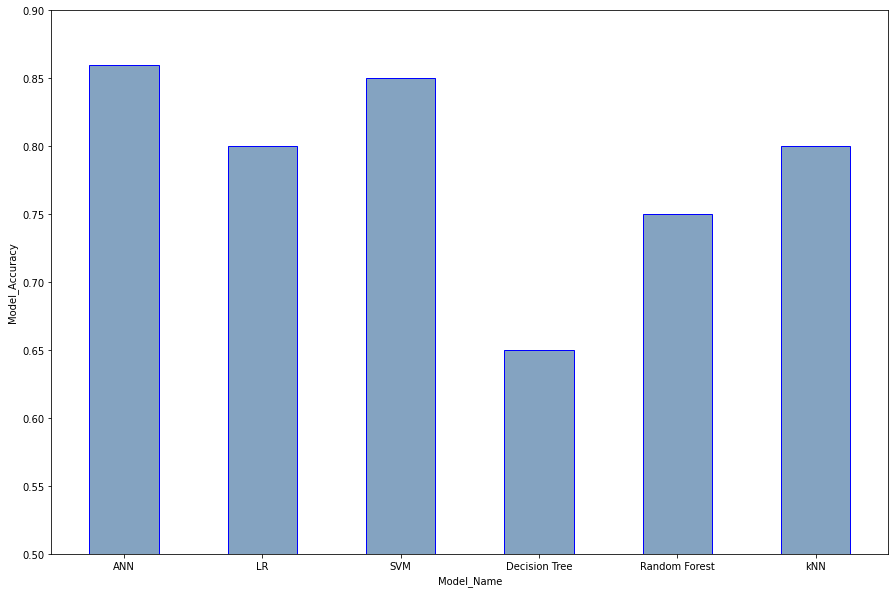

In [20]:
plt.figure(figsize=(15,10))
plt.bar(ModelName, ModelAccuracy, width=0.5, color=(0.2, 0.4, 0.6, 0.6),edgecolor='blue')
plt.ylim([0.50,0.90])
plt.xlabel('Model_Name')
plt.ylabel('Model_Accuracy')